<a href="https://colab.research.google.com/github/ujanichakma/Assginment2/blob/main/AI_Lab_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in the latex format based on your observation after:
building a Fully Connected Feedforward Neural Network (FCFNN) for solving the equation f(x) = 5x^2 +10x -2
training the FCFNN
plotting original f(x) and predicted f(x)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 64)            │        576 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_8 (Dense)             │ (None, 64)            │      4,160 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_9 (Dense)             │ (None, 32)            │      2,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_10 (Dense)            │ (None, 16)            │        528 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_11 (Dense)            │ (None, 1)             │         17 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 7,377 (28.82 KB)

 Trainable params: 7,377 (28.82 KB)

 Non-trainable params: 0 (0.00 B)

(10000,) 10000
total_n: 10000, train_n: 7000, val_n: 1000, test_n: 2000
Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 583980.5625 - mae: 532.8685 - val_loss: 55324.0703 - val_mae: 208.7861
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 51845.2852 - mae: 202.2742 - val_loss: 41107.4141 - val_mae: 176.2999
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35031.9141 - mae: 158.0155 - val_loss: 11023.9688 - val_mae: 90.4722
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9726.2090 - mae: 83.5788 - val_loss: 4678.3818 - val_mae: 57.5491
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3523.4973 - mae: 46.0999 - val_loss: 1072.8704 - val_mae: 23.5681
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1120.7418 - mae: 24.1785 - val_loss: 367.9317 - val_mae: 12.7491
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 430.6165 - mae: 15.1893 - val_loss: 578.6110 - val_mae: 17.4451
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━

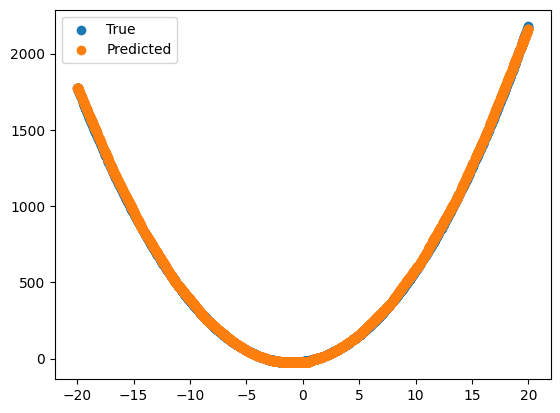

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score   # For accuracy (R² score)


def build_model():
    inputs = Input((1,))
    h1 = Dense(8, activation='relu')(inputs)
    h2 = Dense(64, activation='relu')(h1)
    h3 = Dense(64, activation='relu')(h2)
    h4 = Dense(32, activation='relu')(h3)
    h5 = Dense(16,activation='relu')(h4)
    outputs = Dense(1)(h5)

    model = Model(inputs, outputs)
    model.summary(show_trainable=True)
    return model


def polynomial_e(x):
    y = 5 * x**2 + 10 * x - 20
    return y


def data_process(n=10000):
    # Generate random inputs between -20 and 20
    x = np.random.uniform(low=-20, high=20, size=n)
    y = polynomial_e(x)
    return x, y


def prepare_train_val_test():
    x, y = data_process()
    total_n = len(x)
    print(x.shape, total_n)


    indices = np.random.permutation(total_n)
    x, y = x[indices], y[indices]


    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)
    test_n = int(total_n * 0.2)

    trainX = x[:train_n]
    trainY = y[:train_n]
    valX = x[train_n: train_n + val_n]
    valY = y[train_n: train_n + val_n]
    testX = x[train_n + val_n:]
    testY = y[train_n + val_n:]
    print('total_n: {}, train_n: {}, val_n: {}, test_n: {}'.format(len(x), len(trainX), len(valX), len(testX)))

    return (trainX, trainY), (valX, valY), (testX, testY)


def main():

    model = build_model()
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])


    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()


    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=30)


    loss, mae = model.evaluate(testX, testY, verbose=0)
    print(f"Test Loss (MSE): {loss:.4f}")
    print(f"Test MAE: {mae:.4f}")


    y_pred = model.predict(testX)


    r2 = r2_score(testY, y_pred)
    accuracy = r2 * 100
    print(f"Approx Accuracy: {accuracy:.2f}%")


    plt.scatter(testX, testY, label="True")
    plt.scatter(testX, y_pred, label="Predicted")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()